In [55]:
from lmfit import Parameters, fit_report, minimize
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

from EnzymePynetics.core.measurement import Measurement

ModuleNotFoundError: No module named 'EnzymePynetics'

In [25]:
KM = 4
KCAT = 12

init_sub = [0.5, 2, 8, 15, 30]
enzyme = 0.1

In [7]:
params = Parameters()
params.add("k_cat", value=KCAT, min=0.01*KCAT, max=100*KCAT)
params.add("K_m", value=KM, min=0.01*KM, max=100*KM)

In [26]:
def menten_irrev(w0: tuple, t, params):
    cS, cE, cP, cI = w0

    k_cat = params['k_cat'].value
    K_m = params['K_m'].value

    dc_S = -k_cat * cE * cS / (K_m+cS)
    dc_E = 0
    dc_P = -dc_S
    dc_I = 0

    return (dc_S, dc_E, dc_P, dc_I)


def g(t, w0, params):
    '''
    Solution to the ODE w'(t)=f(t,w,p) with initial condition w(0)= w0 (= [S0])
    '''
    w = odeint(menten_irrev, w0, t, args=(params,))
    return w

In [32]:
time = np.arange(21)

substrate = np.empty((len(init_sub), len(time)))
for i, conc in enumerate(init_sub):
    substrate[i] = g(t=time, w0=(conc, enzyme, 0, 0), params=params).T[0]




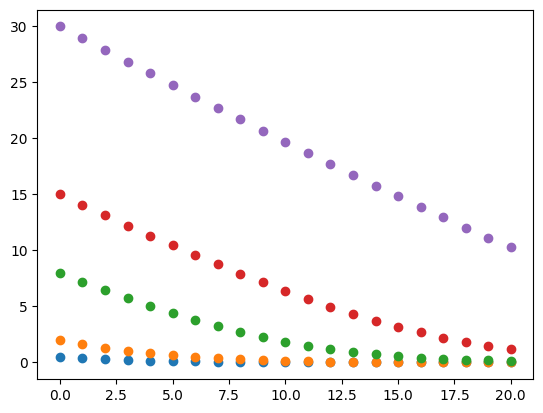

In [35]:
for conc in substrate:
    plt.scatter(time, conc)
plt.show()    

In [36]:
measurement = Measurement()

NameError: name 'Measurement' is not defined